In [26]:
from __future__ import print_function
import pandas as pd
import numpy as np
import os
import pickle
import os.path
from datetime import datetime
import pyarrow
import matplotlib.pyplot as plt
%matplotlib inline

#set ggplot style
plt.style.use('ggplot')

In [22]:
#Constant parameters
FILE = 'data/updated_2020-01-30.parquet.gzip'


df = pd.read_parquet(FILE)

In [45]:
# Convert types
for col in ['confirmed', 'deaths', 'recovered']:
    df[col] = df[col].replace('', 0).astype(int)


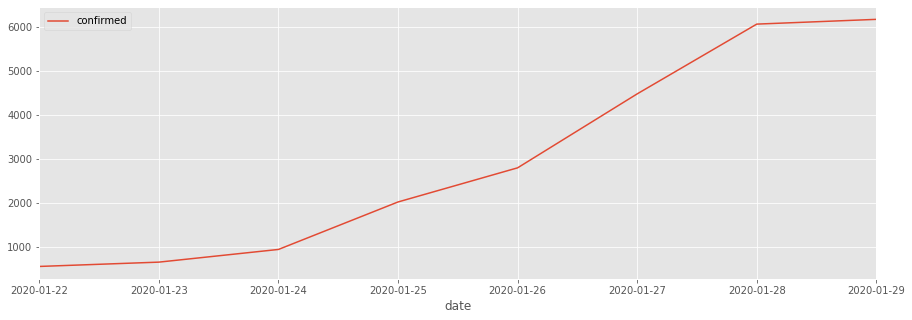

In [57]:
fig, ax = plt.subplots(figsize=(15,5))
df.groupby(['date'])[['confirmed']].sum().plot(ax=ax)

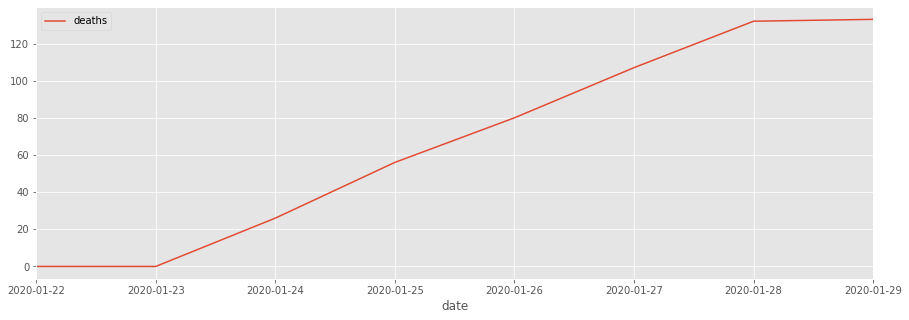

In [58]:
fig, ax = plt.subplots(figsize=(15,5))
df.groupby(['date'])[['deaths']].sum().plot(ax=ax)

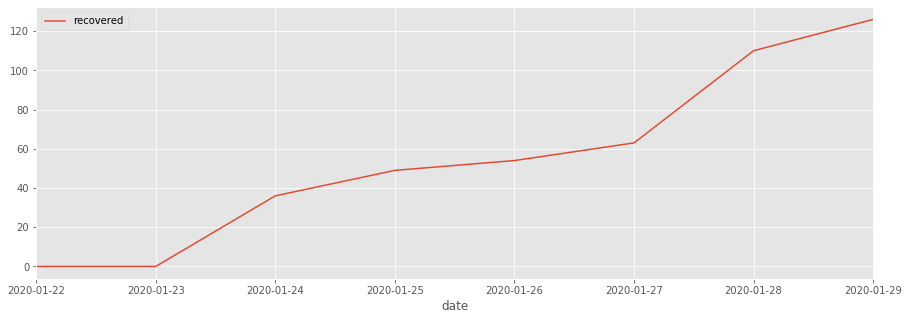

In [59]:
fig, ax = plt.subplots(figsize=(15,5))
df.groupby(['date'])[['recovered']].sum().plot(ax=ax)

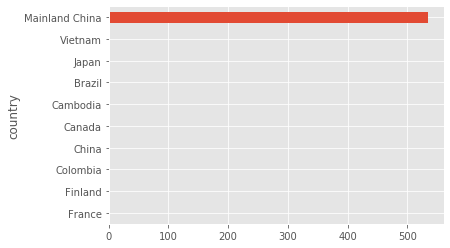

In [128]:
x = df.groupby('country')['deaths'].sum().sort_values().tail(10)
x.plot(kind='barh')

In [130]:
df.province.value_counts()

                    71
Sichuan              8
Taiwan               8
Heilongjiang         8
Henan                8
Beijing              8
Guizhou              8
Shaanxi              8
Anhui                8
Shandong             8
Hong Kong            8
Tianjin              8
Jiangsu              8
Fujian               8
Hebei                8
Guangdong            8
Shanghai             8
Guangxi              8
Hubei                8
Ningxia              8
Gansu                8
Zhejiang             8
Inner Mongolia       8
Chongqing            8
Hainan               8
Washington           8
Jiangxi              8
Xinjiang             8
Hunan                8
Shanxi               8
Liaoning             8
Qinghai              8
Macau                8
Jilin                8
Yunnan               8
Illinois             5
Ontario              4
Arizona              4
California           4
New South Wales      3
Victoria             3
Bavaria              3
Tibet                2
British Col